In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline




In [109]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')

In [110]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [111]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [113]:
dict_with_null = {}
for col in train.columns:
    if train[col].isnull().sum() > 0:
        dict_with_null[col] = train[col].isnull().sum()/train.shape[0]
sorted (dict_with_null)
dict_with_null

{'LotFrontage': 0.1773972602739726,
 'Alley': 0.9376712328767123,
 'MasVnrType': 0.005479452054794521,
 'MasVnrArea': 0.005479452054794521,
 'BsmtQual': 0.025342465753424658,
 'BsmtCond': 0.025342465753424658,
 'BsmtExposure': 0.026027397260273973,
 'BsmtFinType1': 0.025342465753424658,
 'BsmtFinType2': 0.026027397260273973,
 'Electrical': 0.0006849315068493151,
 'FireplaceQu': 0.4726027397260274,
 'GarageType': 0.05547945205479452,
 'GarageYrBlt': 0.05547945205479452,
 'GarageFinish': 0.05547945205479452,
 'GarageQual': 0.05547945205479452,
 'GarageCond': 0.05547945205479452,
 'PoolQC': 0.9952054794520548,
 'Fence': 0.8075342465753425,
 'MiscFeature': 0.963013698630137}

In [114]:
columns_deleted = [col for col in train.columns if train[col].isnull().sum()/train.shape[0]>0.8]
columns_deleted

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [115]:
dict_with_null_2 = {}
for col in test.columns:
    if test[col].isnull().sum() > 0:
        dict_with_null_2[col] = test[col].isnull().sum()/test.shape[0]
sorted (dict_with_null_2)
dict_with_null_2

{'MSZoning': 0.0027416038382453737,
 'LotFrontage': 0.15558601782042494,
 'Alley': 0.9266620973269363,
 'Utilities': 0.0013708019191226869,
 'Exterior1st': 0.0006854009595613434,
 'Exterior2nd': 0.0006854009595613434,
 'MasVnrType': 0.010966415352981495,
 'MasVnrArea': 0.01028101439342015,
 'BsmtQual': 0.03015764222069911,
 'BsmtCond': 0.030843043180260453,
 'BsmtExposure': 0.03015764222069911,
 'BsmtFinType1': 0.02878684030157642,
 'BsmtFinSF1': 0.0006854009595613434,
 'BsmtFinType2': 0.02878684030157642,
 'BsmtFinSF2': 0.0006854009595613434,
 'BsmtUnfSF': 0.0006854009595613434,
 'TotalBsmtSF': 0.0006854009595613434,
 'BsmtFullBath': 0.0013708019191226869,
 'BsmtHalfBath': 0.0013708019191226869,
 'KitchenQual': 0.0006854009595613434,
 'Functional': 0.0013708019191226869,
 'FireplaceQu': 0.5003427004797807,
 'GarageType': 0.0520904729266621,
 'GarageYrBlt': 0.053461274845784786,
 'GarageFinish': 0.053461274845784786,
 'GarageCars': 0.0006854009595613434,
 'GarageArea': 0.00068540095956

In [116]:
train.drop(columns_deleted, axis=1, inplace=True)
test.drop(columns_deleted, axis=1, inplace=True)

In [117]:
train.shape, test.shape

((1460, 76), (1459, 75))

In [118]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.columns[i], corr_matrix.columns[j])
                #colname = corr_matrix.columns[i] # getting the name of column
                #print (colname)
                #col_corr.add(colname)
                #if colname in dataset.columns:
                #    del dataset[colname] # deleting the column from the dataset

#print(dataset)
correlation(train, 0.7)

1stFlrSF TotalBsmtSF
TotRmsAbvGrd GrLivArea
GarageYrBlt YearBuilt
GarageArea GarageCars
SalePrice OverallQual
SalePrice GrLivArea


In [119]:
#Delete highcorrelated features
high_corr_feat = ['TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars']
train.drop(high_corr_feat, axis=1, inplace=True)
test.drop(high_corr_feat, axis=1, inplace=True)

In [120]:
train.shape, test.shape

((1460, 72), (1459, 71))

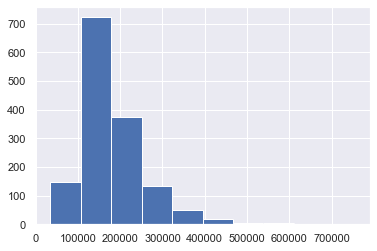

In [121]:
train['SalePrice'].hist()

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 72 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [123]:
dict_with_null_num = {}
for col in train.columns:
    if train[col].isnull().sum() > 0 and train[col].dtype in ['int64', 'float64']:
        dict_with_null_num[col] = train[col].isnull().sum()/train.shape[0]
sorted (dict_with_null_num)
dict_with_null_num

{'LotFrontage': 0.1773972602739726, 'MasVnrArea': 0.005479452054794521}

In [124]:
dict_with_null_num_2 = {}
for col in test.columns:
    if test[col].isnull().sum() > 0 and test[col].dtype in ['int64', 'float64']:
        dict_with_null_num_2[col] = test[col].isnull().sum()/test.shape[0]
sorted (dict_with_null_num_2)
dict_with_null_num_2

{'LotFrontage': 0.15558601782042494,
 'MasVnrArea': 0.01028101439342015,
 'BsmtFinSF1': 0.0006854009595613434,
 'BsmtFinSF2': 0.0006854009595613434,
 'BsmtUnfSF': 0.0006854009595613434,
 'BsmtFullBath': 0.0013708019191226869,
 'BsmtHalfBath': 0.0013708019191226869,
 'GarageArea': 0.0006854009595613434}

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 72 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [126]:

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())

    
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].median())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].median())


In [127]:
dict_with_null_num_2 = {}
for col in test.columns:
    if test[col].isnull().sum() > 0 and test[col].dtype in ['int64', 'float64']:
        dict_with_null_num_2[col] = test[col].isnull().sum()/test.shape[0]
sorted (dict_with_null_num_2)
dict_with_null_num_2

{}

In [128]:
y = np.log(train['SalePrice'].values)
train = train.drop(['SalePrice'], axis=1)

In [129]:
data = pd.concat([train, test], axis=0)
data.shape

(2919, 71)

In [130]:
object_cols = [cname for cname in train.columns if train[cname].dtype == 'object']

data_obj = train[object_train_cols].copy()

data_obj = pd.get_dummies(data_obj)

In [131]:
data = data.drop(object_cols, axis=1)
data = pd.concat([data, data_obj], axis=1)
data.shape

(2919, 271)

In [138]:
train = data[:len(train)]
test = data[len(train):]
train.shape, test.shape

((1460, 271), (1459, 271))

In [140]:
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

skf = KFold(n_splits=5, shuffle=True, random_state=42)
params = {'booster':['gbtree', 'gbtree'],
         'max_depth': np.arange(3,11),
         'n_estimators': [300, 600, 900, 1200, 1500],
         'learning_rate': [0.001, 0.01, 0.05]}
model_1 = XGBRegressor()

rscv = RandomizedSearchCV(estimator=model_1, 
                  param_distributions=params, 
                  cv=skf, n_iter=20, n_jobs=2)
scores = -1 * cross_val_score(rscv, train, y, cv=skf, scoring='neg_mean_absolute_error')
np.mean(scores)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.08381297359463555

In [145]:
rscv.fit(train, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          m...
                                          tree_method=None,
                                          validate_parameters=False,
                                          verbosity=None),
                   iid='warn', n_iter=20, n_jobs=2,
                

In [150]:
rscv.best_params_, rscv.best_score_

({'n_estimators': 600,
  'max_depth': 3,
  'learning_rate': 0.05,
  'booster': 'gbtree'},
 0.8880322540682818)

In [152]:
pred = rscv.predict(test)

In [155]:
predicted_saleprice = np.exp(pred)
predicted_saleprice

array([113985.71, 135918.52, 163720.28, ..., 156229.55, 105455.35,
       202515.3 ], dtype=float32)

In [157]:
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': predicted_saleprice})
output.to_csv('submission_new1.csv', index=False)
## MAE около 30000

In [160]:
rscv_df = pd.DataFrame(rscv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rscv_df = rscv_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score',
            'split3_test_score',
            'split4_test_score',
            'std_test_score'],
            axis=1)
rscv_df.head(10)

,param_n_estimators,param_max_depth,param_learning_rate,param_booster,mean_test_score,rank_test_score
0,600,3,0.05,gbtree,0.888032,1
1,1200,4,0.05,gbtree,0.885073,2
2,1200,5,0.05,gbtree,0.883530,3
3,1200,4,0.01,gbtree,0.882368,4
4,1500,7,0.01,gbtree,0.881161,5
5,1200,8,0.05,gbtree,0.880313,6
6,600,9,0.05,gbtree,0.879153,7
7,900,4,0.01,gbtree,0.878759,8
8,900,6,0.01,gbtree,0.878320,9
9,1200,10,0.01,gbtree,0.877178,10


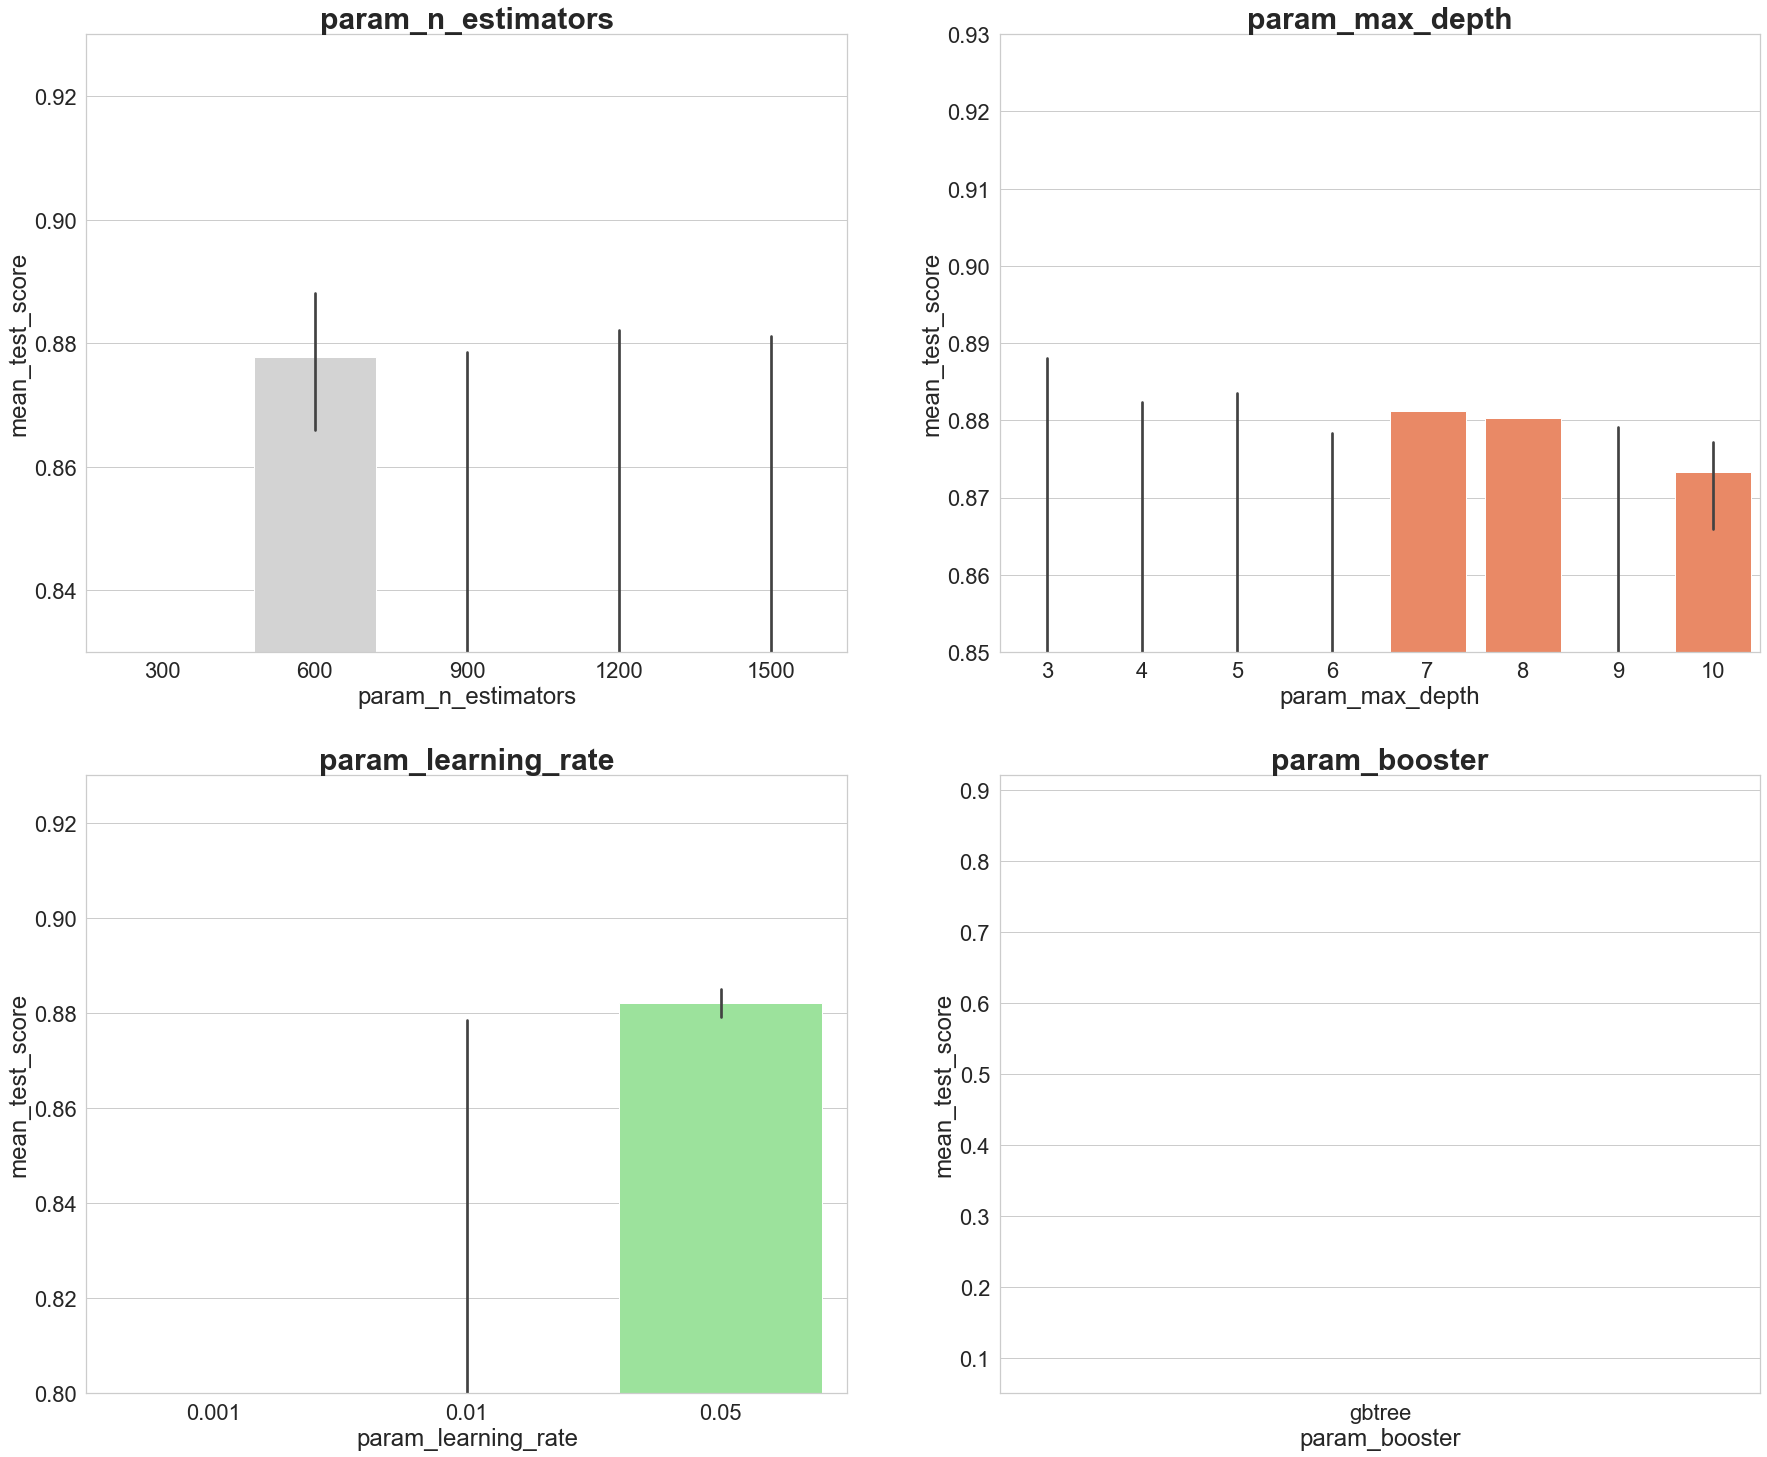

In [170]:
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rscv_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'param_n_estimators', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rscv_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'param_max_depth', size=30, weight='bold')
sns.barplot(x='param_learning_rate', y='mean_test_score', data=rscv_df, ax=axs[1,0], color='lightgreen')
axs[1,0].set_ylim([.80,.93])
axs[1,0].set_title(label = 'param_learning_rate', size=30, weight='bold')
sns.barplot(x='param_booster', y='mean_test_score', data=rscv_df, ax=axs[1,1], color='wheat')
axs[1,1].set_ylim([.05,.92])
axs[1,1].set_title(label = 'param_booster', size=30, weight='bold')
#sns.barplot(x='param_max_depth', y='mean_test_score', data=rscv_df, ax=axs[1,1], color='lightpink')
#axs[1,1].set_ylim([.80,.93])axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
#sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
#axs[1,2].set_ylim([.88,.92])
#axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [173]:
%%time
from sklearn.model_selection import GridSearchCV
n_estimators = [600,1200,1500]
max_depth = [3,4,5]
learning_rate = [0.01,0.05]
booster = ['gbtree']
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'booster': booster}
gs = GridSearchCV(estimator=model_1, 
                  param_grid=param_grid, 
                  cv=skf, n_jobs=-1, verbose=-1)
scores = -1 * cross_val_score(gs, train, y, cv=skf, scoring='neg_mean_absolute_error')
np.mean(scores)
gs.fit(train, y)
gs.best_estimator_
gs.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Don

CPU times: user 3min 29s, sys: 1.45 s, total: 3min 31s
Wall time: 1h 18min 31s


{'booster': 'gbtree',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 1500}

In [175]:
gs.best_score_

0.8897855297943253

In [177]:
pred_2 = gs.best_estimator_.predict(test)

In [178]:
predicted_saleprice_2 = np.exp(pred_2)
predicted_saleprice

array([113985.71, 135918.52, 163720.28, ..., 156229.55, 105455.35,
       202515.3 ], dtype=float32)

In [179]:
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': predicted_saleprice_2})
output.to_csv('submission_new2.csv', index=False)